# Intensity Transformation

In [1]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np

%matplotlib inline

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
# Helper function to display multiple images in a plot
def display_images_normalized(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()

### Part 1

In [3]:
# Helper function required for this part
def BitQuantizeImage(im, k):
    img = np.zeros(im.shape)
    bit = k - 1
    for i in range(8, 8 - k, -1):
        if isinstance(im[0][0], np.ndarray) == False:
            # Processing a grayscale image
            img = img + ((((1 << (i - 1)) & im) > 0) * P[bit])
        else:
            # Processing a color image
            # Change in index is due to normalization!
            img = img + ((((1 << (i - 1)) & im) > 0) * P[i - 1])
        bit = bit - 1
    img = img.astype(np.uint8)
    return img
# Dependency for the above function
# Precompute powers of 2
P = []
P.append(1)
for i in range(1, 10):
    P.append(P[i - 1] * 2)

In [4]:
def negative_image(im, L):
    img = np.zeros(im.shape)
    img = L - im - 1
    return img.astype(np.uint8)

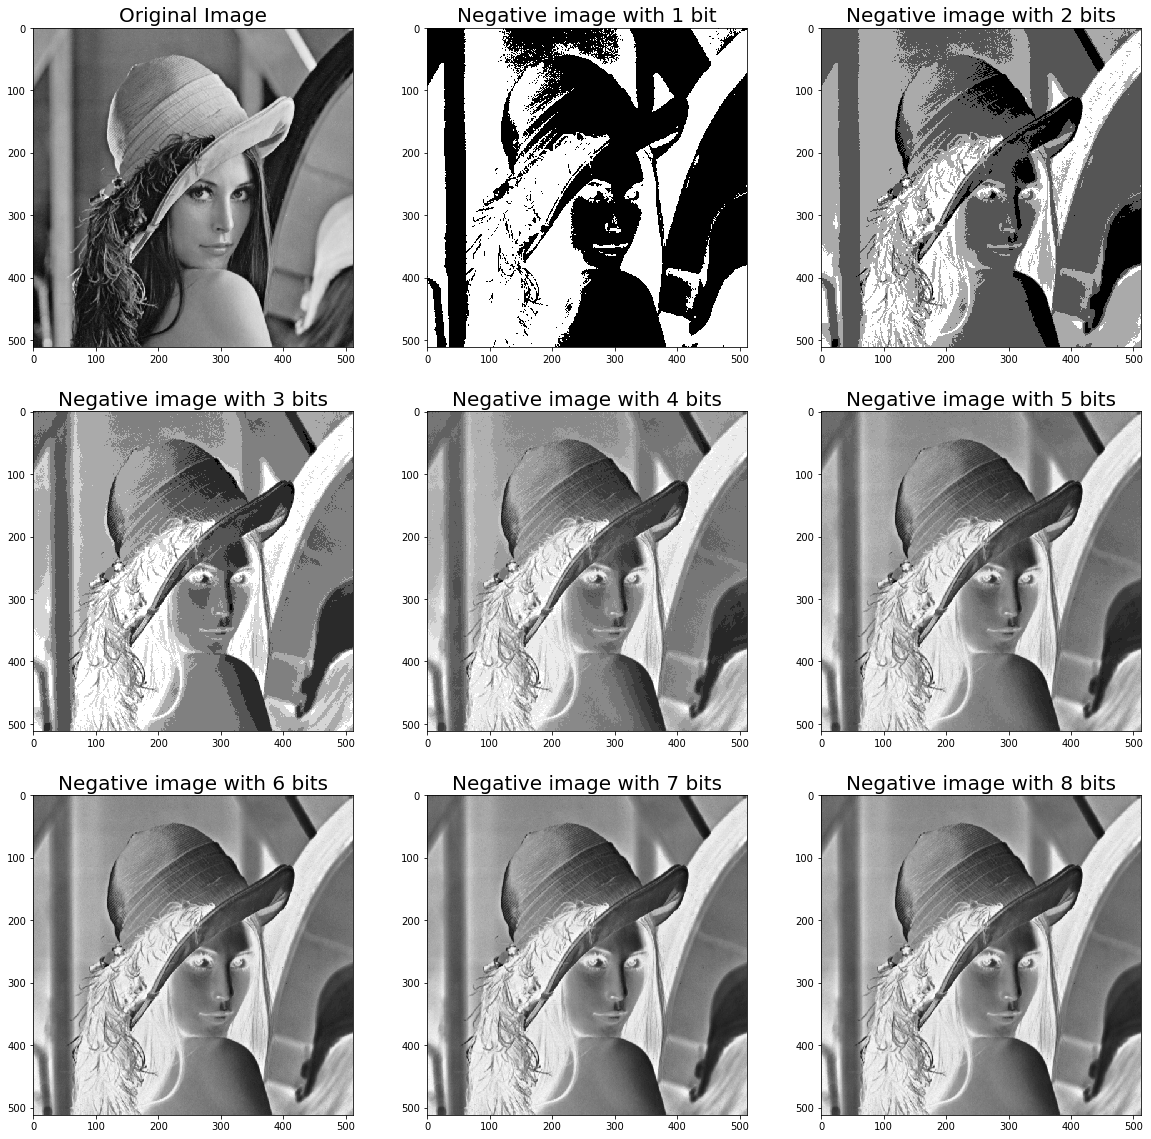

In [5]:
img = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
images = []
images.append(img)
images.append(negative_image(BitQuantizeImage(img, 1), P[1]))
images.append(negative_image(BitQuantizeImage(img, 2), P[2]))
images.append(negative_image(BitQuantizeImage(img, 3), P[3]))
images.append(negative_image(BitQuantizeImage(img, 4), P[4]))
images.append(negative_image(BitQuantizeImage(img, 5), P[5]))
images.append(negative_image(BitQuantizeImage(img, 6), P[6]))
images.append(negative_image(BitQuantizeImage(img, 7), P[7]))
images.append(negative_image(BitQuantizeImage(img, 8), P[8]))
display_images_normalized(images, 3, 3, (20, 20), 'title', ['Original Image', 'Negative image with 1 bit', 'Negative image with 2 bits', 'Negative image with 3 bits', 'Negative image with 4 bits', 'Negative image with 5 bits', 'Negative image with 6 bits', 'Negative image with 7 bits', 'Negative image with 8 bits'])

### Part 2

In [6]:
def power_law(im, gamma):
    im = im.astype(np.float64)
    im = im / 255
    img = np.zeros(im.shape)
    img = im ** gamma
    img = img * 255
    return img.astype(np.uint8)

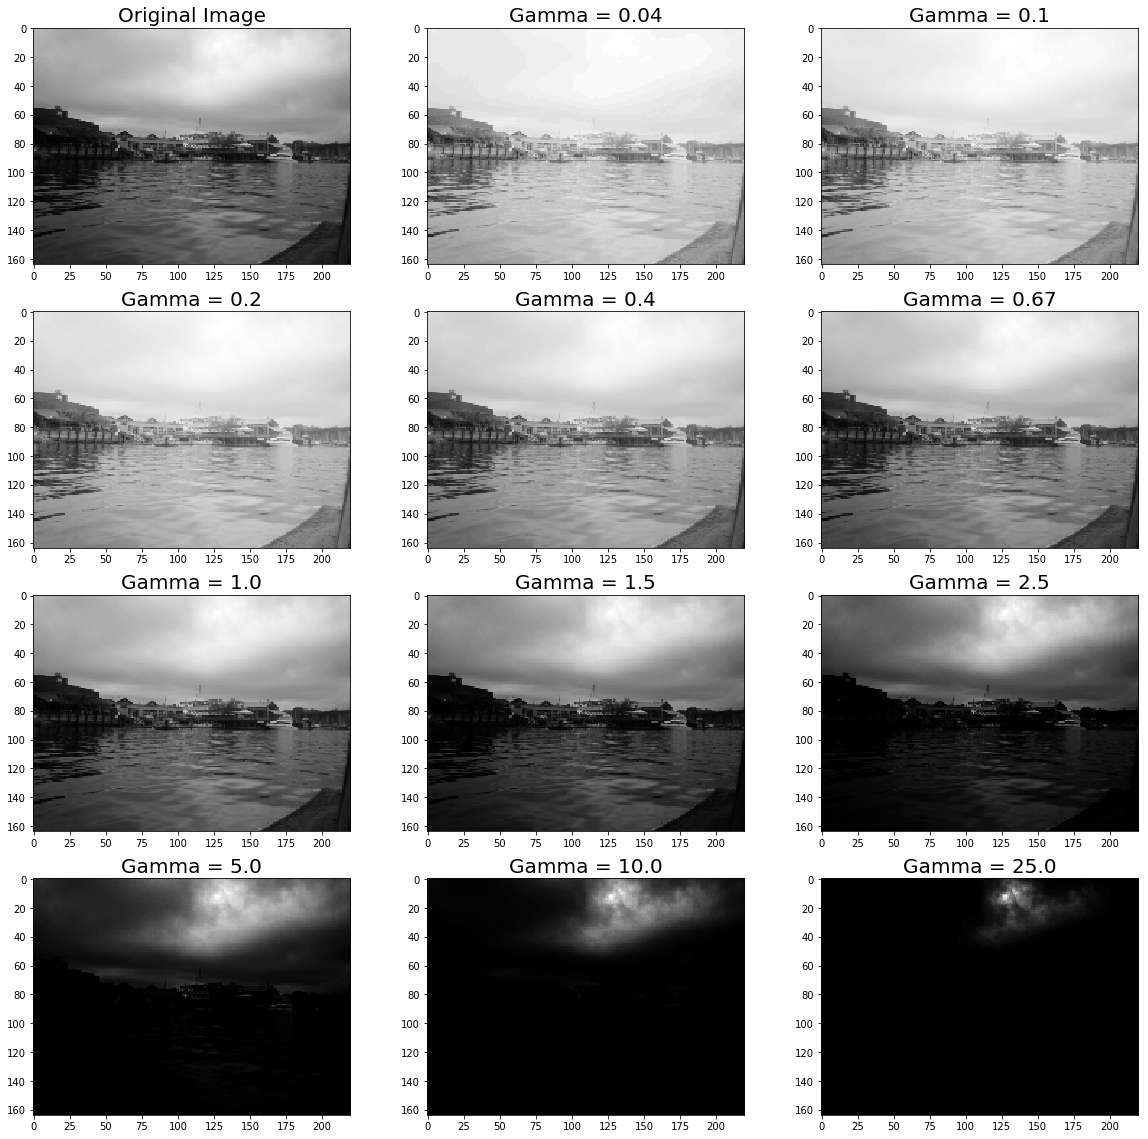

In [7]:
img = cv2.imread('../input_data/gamma-corr.png', cv2.IMREAD_GRAYSCALE)
images = []
subtitle = []
images.append(img)
subtitle.append('Original Image')
gammas = [0.04, 0.10, 0.20, 0.40, 0.67, 1.0, 1.5, 2.5, 5.0, 10.0, 25.0]
c = 0
for i in range(4):
    for j in range(3):
        if i == 3 and j == 2:
            break
        images.append(power_law(img, gammas[c]))
        subtitle.append('Gamma = ' + str(gammas[c]))
        c = c + 1
display_images_normalized(images, 4, 3, (20, 20), 'title', subtitle)

#### Observations:
The original image corresponds to the image with gamma value equal to 1. This is as expected because the gamma transformation with gamma = 1 corresponds to an identity transform as evident from the gamma transform plot given in the slides<br>
The images become darker with increasing gamma. This is according to what we expect. As gamma increases we can see from the gamma transformation plot (given in the slides) that an increased number of intensities are transformed to a very small range of intensities and then there is exponential increase in transformed intensities for the remaining higher intensity values. Therefore, there are very less high intensity values resulting in an overall darker image<br>
The same argument applies to why decreasing gamma results in brighter images or images with low intensities. The gamma transformation plot shows that a small number of intensities are mapped to a very large range of intensities and then there is slow increase for the remaining intensities. This is why majority of intensities are high because initial increase in transformed intensity is exponential after which it increases slowly. 

### Part 3

In [8]:
def piecewiseLinearTransform(im, coeff, intervals):
    im = im.astype(np.float64)
    img = np.zeros(im.shape)
    for i in range(len(coeff)):
        tmp1 = (im >= intervals[i][0])
        tmp2 = (im <= intervals[i][1])
        tmp = tmp1 & tmp2
        img = img + (tmp  * coeff[i][0] * im) + (tmp * coeff[i][1])
    return img.astype(np.uint8)

In [9]:
# This helper function computes the coefficients K1, K2 given the end points of the linear transform
def computeCoeff(x1, y1, x2, y2):
    x1 = x1 * 255
    y1 = y1 * 255
    x2 = x2 * 255
    y2 = y2 * 255
    m = (y2 - y1) * 1.0 / (x2 - x1)
    return [m, -m*x1 + y1]

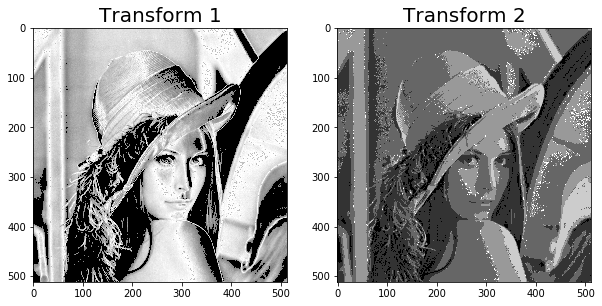

In [10]:
img = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
images = []
images.append(piecewiseLinearTransform(img, [computeCoeff(0, 0, 0.3, 0), computeCoeff(0.3, 0.4, 0.6, 0.8), computeCoeff(0.6, 0.8, 0.8, 0.4), computeCoeff(0.8, 0, 1.0, 0)], \
    [[0, 255 * 0.3], [0.3 * 255, 0.6 * 255], [0.6 * 255, 0.8 * 255], [0.8 * 255, 255]]))
images.append(piecewiseLinearTransform(img, [[0, 0], [0, 0.2 * 255], [0, 0.4 * 255], [0, 0.6 * 255], [0, 0.8 * 255]], \
    [[0, 255 * 0.2], [0.2 * 255, 0.4 * 255], [0.4 * 255, 0.6 * 255], [0.6 * 255, 0.8 * 255], [0.8 * 255, 255]]))
display_images_normalized(images, 1, 2, (10, 20), 'title', ['Transform 1', 'Transform 2'])